<h1 style="color: #008000; font-size: 36px; text-align: center;">Top 50 cryptocurrency</h1>


<h1>Project Summary: Live Cryptocurrency Data Analysis</h1>

<hr>

<h2>Objective</h2>
<p>
The project aims to fetch live cryptocurrency data for the top 50 cryptocurrencies by market capitalization, 
perform analysis on the data, and present it in a continuously updating Excel sheet. 
Key insights are summarized in an analysis report.
</p>

<hr>

<h2>Components</h2>

<h3>1. Fetching Live Data</h3>
<ul>
  <li>Data is retrieved from the <b>CoinGecko API</b> for the top 50 cryptocurrencies.</li>
  <li>Fields include:
    <ul>
      <li>Cryptocurrency Name</li>
      <li>Symbol</li>
      <li>Current Price (in USD)</li>
      <li>Market Capitalization</li>
      <li>24-hour Trading Volume</li>
      <li>24-hour Price Change (percentage)</li>
    </ul>
  </li>
</ul>

<h3>2. Data Analysis</h3>
<ul>
  <li>Key analysis performed on the fetched data includes:
    <ul>
      <li>Identifying the top 5 cryptocurrencies by market cap.</li>
      <li>Calculating the average price of the top 50 cryptocurrencies.</li>
      <li>Analyzing the highest and lowest 24-hour percentage price change.</li>
    </ul>
  </li>
</ul>

<h3>3. Live Updating Excel Sheet</h3>
<ul>
  <li>An Excel file is created and updated every 5 minutes with live cryptocurrency data.</li>
  <li>The Excel sheet includes all relevant metrics and is hosted online for real-time access.</li>
</ul>

<h3>4. Analysis Report</h3>
<ul>
  <li>A concise report summarizes key insights, such as:
    <ul>
      <li>The top 5 cryptocurrencies by market capitalization.</li>
      <li>Trends in price changes and trading volumes.</li>
      <li>Notable gainers and losers in the market.</li>
    </ul>
  </li>
</ul>

<hr>

<h2>Technologies Used</h2>
<ul>
  <li><b>Python</b>: For data fetching, processing, and analysis.</li>
  <li><b>APIs</b>: CoinGecko API for live cryptocurrency data.</li>
  <li><b>Excel Integration</b>: Using Python libraries like <code>openpyxl</code> for live updates.</li>
  <li><b>Cloud Hosting</b>: Hosting the Excel sheet on Google Drive or OneDrive for real-time sharing.</li>
  <li><b>PDF Generation</b>: <code>FPDF</code> for creating the analysis report.</li>
</ul>

<hr>

<h2>Deliverables</h2>
<ol>
  <li><b>Python Script</b>: Automates data fetching, analysis, and Excel updates.</li>
  <li><b>Live Excel Sheet</b>: Hosted online with continuously updating data.</li>
  <li><b>Analysis Report</b>: Summarizes key insights in PDF format with visualizations.</li>
</ol>

<hr>

<p>
This project provides real-time insights into the cryptocurrency market, combining data-driven analysis 
with live visualization, making it a valuable tool for investors and enthusiasts.
</p>


In [4]:
import requests
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Function to fetch top 50 cryptocurrency data
def fetch_crypto_data():
    url = "https://api.coingecko.com/api/v3/coins/markets"
    params = {
        'vs_currency': 'usd',
        'order': 'market_cap_desc',
        'per_page': 50,
        'page': 1,
        'sparkline': 'false'
    }
    response = requests.get(url, params=params)
    data = response.json()
    
    # Extract relevant fields
    crypto_data = []
    for coin in data:
        crypto_data.append({
            'Cryptocurrency Name': coin['name'],
            'Symbol': coin['symbol'],
            'Current Price (USD)': coin['current_price'],
            'Market Capitalization': coin['market_cap'],
            '24-hour Trading Volume': coin['total_volume'],
            '24-hour Price Change (%)': coin['price_change_percentage_24h']
        })
    return pd.DataFrame(crypto_data)

# Fetch data and save to DataFrame
crypto_df = fetch_crypto_data()
print(crypto_df)


                      Cryptocurrency Name  Symbol  Current Price (USD)  \
0                                 Bitcoin     btc         98600.000000   
1                                Ethereum     eth          3469.700000   
2                                  Tether    usdt             1.002000   
3                                  Solana     sol           260.740000   
4                                     BNB     bnb           671.930000   
5                                     XRP     xrp             1.560000   
6                                Dogecoin    doge             0.456416   
7                                 Cardano     ada             1.110000   
8                                    USDC    usdc             0.999772   
9                       Lido Staked Ether   steth          3469.910000   
10                                   TRON     trx             0.218600   
11                              Avalanche    avax            43.260000   
12                                Tonc

Top 5 Cryptocurrencies by Market Cap:


C:\Users\vokar\AppData\Local\Temp\ipykernel_5392\3217831136.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="market_cap", y="name", data=top_5, palette="viridis")


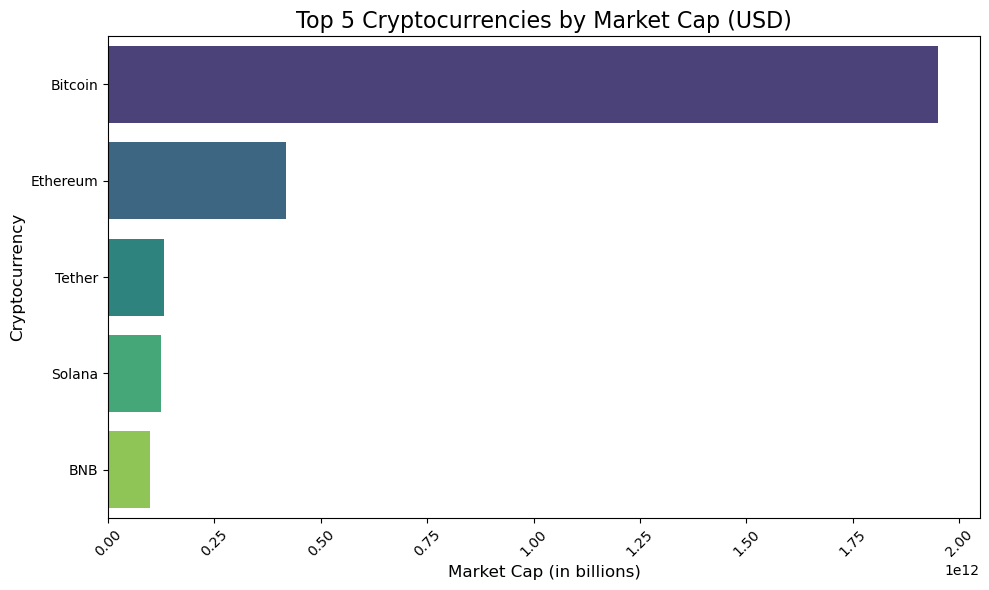

In [7]:
#top 5 Cryptocurrencies
top_5 = crypto_df.nlargest(5, 'Market Capitalization')
print("Top 5 Cryptocurrencies by Market Cap:")


# Rename columns 
top_5.rename(columns={"Market Capitalization": "market_cap", "Cryptocurrency Name": "name"}, inplace=True)

# Plot Top 5 Cryptocurrencies by Market Cap
plt.figure(figsize=(10, 6))
sns.barplot(x="market_cap", y="name", data=top_5, palette="viridis")
plt.title("Top 5 Cryptocurrencies by Market Cap (USD)", fontsize=16)
plt.xlabel("Market Cap (in billions)", fontsize=12)
plt.ylabel("Cryptocurrency", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Average Price of Top 50 Cryptocurrencies: $4352.90


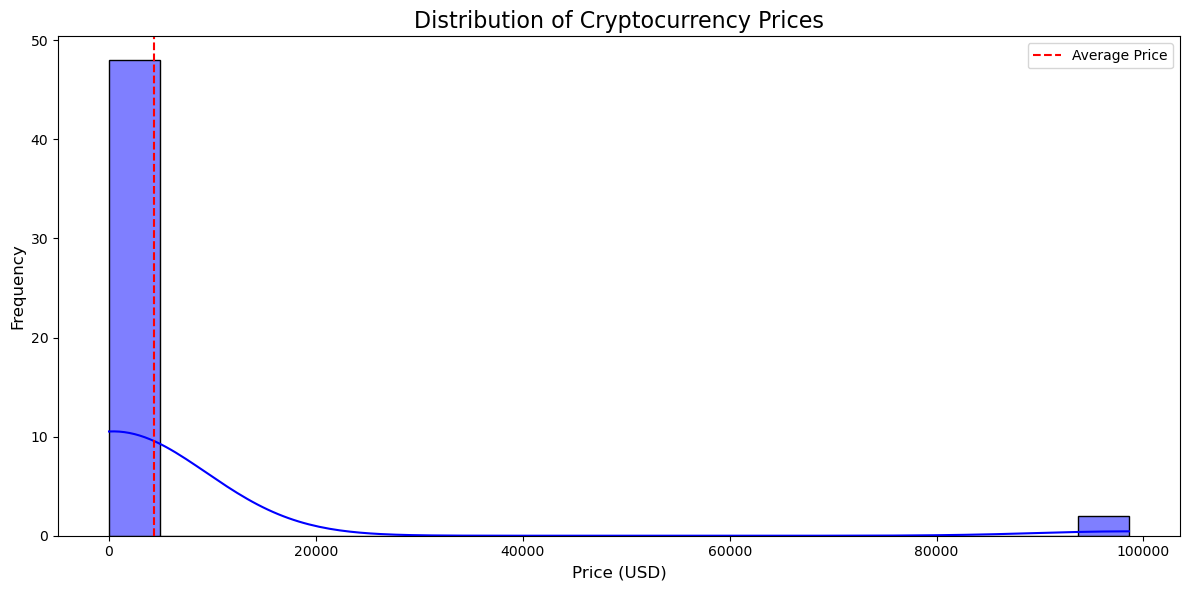

In [12]:
#average Cryptocurrencies
avg_price = crypto_df['Current Price (USD)'].mean()
print(f"Average Price of Top 50 Cryptocurrencies: ${avg_price:.2f}")

# Plot: Histogram for Current Prices
plt.figure(figsize=(12, 6))
sns.histplot(crypto_df['Current Price (USD)'], bins=20, kde=True, color='blue')
plt.axvline(crypto_df['Current Price (USD)'].mean(), color='red', linestyle='--', label='Average Price')
plt.title('Distribution of Cryptocurrency Prices', fontsize=16)
plt.xlabel('Price (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()



Highest 24-hour % Change: 73.98938%
Lowest 24-hour % Change: -1.54623%


C:\Users\vokar\AppData\Local\Temp\ipykernel_5392\2254611312.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='24-hour Trading Volume', y='Cryptocurrency Name', data=top_5_volume, palette='coolwarm')


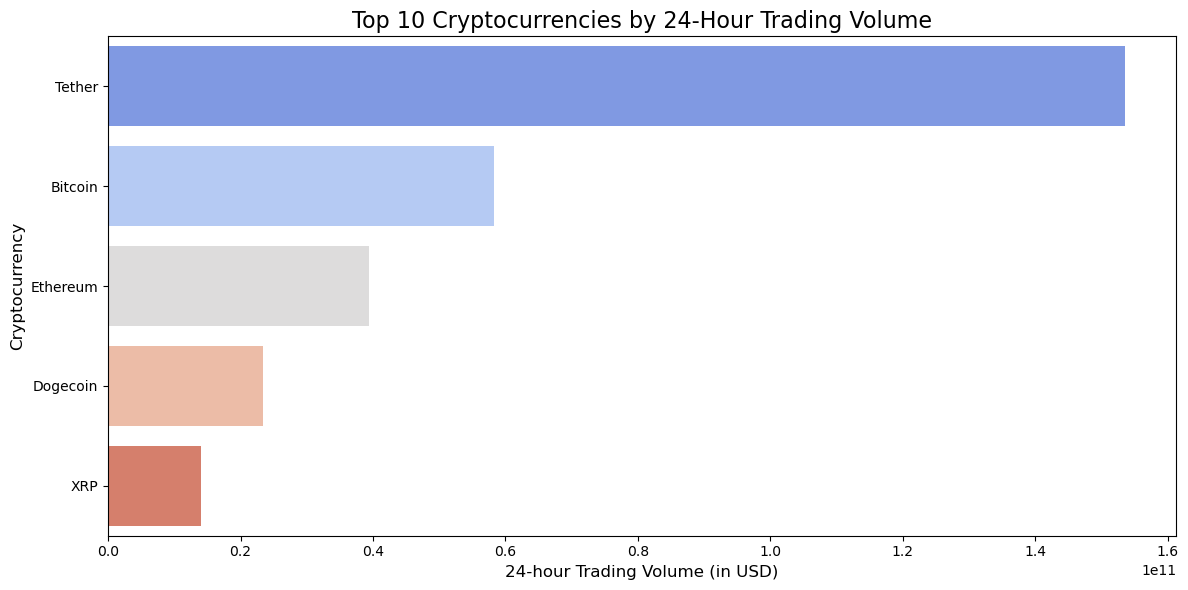

In [13]:
#Highest and Lowest change in 24 hours

highest_change = crypto_df['24-hour Price Change (%)'].max()
lowest_change = crypto_df['24-hour Price Change (%)'].min()
print(f"Highest 24-hour % Change: {highest_change}%")
print(f"Lowest 24-hour % Change: {lowest_change}%")

# Sort and select the top 5 by Trading Volume
top_5_volume = crypto_df.nlargest(5, '24-hour Trading Volume')

# Plot: Bar chart for Trading Volume
plt.figure(figsize=(12, 6))
sns.barplot(x='24-hour Trading Volume', y='Cryptocurrency Name', data=top_5_volume, palette='coolwarm')
plt.title('Top 10 Cryptocurrencies by 24-Hour Trading Volume', fontsize=16)
plt.xlabel('24-hour Trading Volume (in USD)', fontsize=12)
plt.ylabel('Cryptocurrency', fontsize=12)
plt.tight_layout()
plt.show()



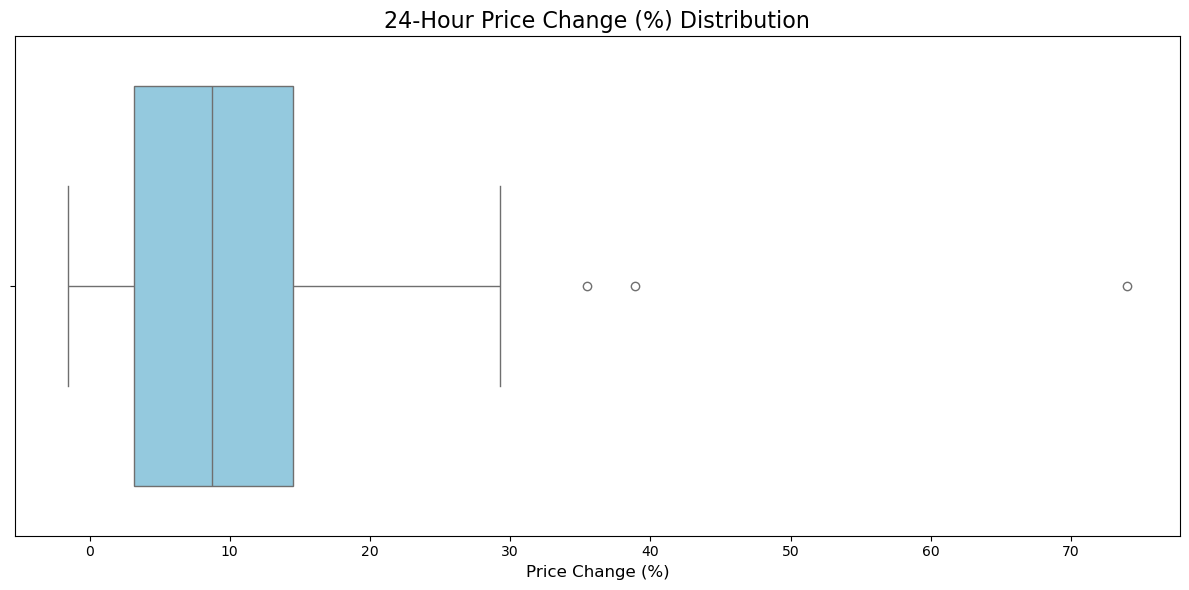

In [14]:
# Plot: Boxplot for 24-hour Price Change (%)
plt.figure(figsize=(12, 6))
sns.boxplot(x=crypto_df['24-hour Price Change (%)'], color='skyblue')
plt.title('24-Hour Price Change (%) Distribution', fontsize=16)
plt.xlabel('Price Change (%)', fontsize=12)
plt.tight_layout()
plt.show()


In [15]:

from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows

# Create Excel workbook and sheet
wb = Workbook()
ws = wb.active
ws.title = "Cryptocurrency Data"

# Write initial data
for row in dataframe_to_rows(crypto_df, index=False, header=True):
    ws.append(row)

# Save workbook
wb.save("crypto_data.xlsx")


<h2 style=" text-align: center; font-size: 28px; border-bottom: 2px solid #2c3e50; padding-bottom: 5px;"> Live data</h2>


In [ ]:
import time

# Update Excel every 5 minutes
def update_excel():
    crypto_df = fetch_crypto_data()
    for row in ws.iter_rows(min_row=2, max_row=ws.max_row, min_col=1, max_col=len(crypto_df.columns)):
        ws.delete_rows(row[0].row) 

    for row in dataframe_to_rows(crypto_df, index=False, header=False):
        ws.append(row)
    wb.save("crypto_data.xlsx")

# Schedule updates
while True:
    update_excel()
    print("Data updated.")
    time.sleep(300)  


Data updated.
Data updated.
